In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

import scipy.stats as stats
import pandas_profiling

In [3]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [5]:
df01= pd.read_csv('CC_GENERAL.csv')

In [6]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [7]:
#pandas_profiling.ProfileReport(df01).to_file(output_file='profilev2.html')

In [8]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [9]:
df01.MINIMUM_PAYMENTS.fillna(value= df01.MINIMUM_PAYMENTS.mean(), inplace= True)

In [10]:
df01.CREDIT_LIMIT.fillna(value= df01.CREDIT_LIMIT.mean(), inplace= True)

In [11]:
df01['Monthly_avg_purchase']= df01.PURCHASES/df01.TENURE
df01['Monthly_cash_advance']= df01.CASH_ADVANCE/df01.TENURE
df01['limit_usage']= df01.BALANCE/df01.CREDIT_LIMIT

In [12]:
#seprate categorical and contionus variables
df01_continous= df01.select_dtypes(include=['float64', 'int64'])


In [13]:
df01_continous.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,14002049.71,1564.47,873.39,2081.53,4332774.97,0.00,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,7851.57,0.88,1.00,0.24,0.06,0.00,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8978683.26,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,5302314.47,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.42,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,8760896.46,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1209.54,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


In [14]:
df01['purchase_type']= np.nan

In [15]:
#df.attack.loc[df.attack.isin(['back','land', 'neptune', 'teardrop', 'smurf', 'pod', 'apache2', 'udpstorm', 'processtable', 'worm'])] ='DoS'

In [16]:
df01.purchase_type.loc[((df01.ONEOFF_PURCHASES== 0) & (df01.INSTALLMENTS_PURCHASES== 0))]= 'None'

C:\Users\Krn\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
df01.purchase_type.loc[((df01.ONEOFF_PURCHASES> 0) & (df01.INSTALLMENTS_PURCHASES== 0))]= 'One_Of'

In [18]:
df01.purchase_type.loc[((df01.ONEOFF_PURCHASES== 0) & (df01.INSTALLMENTS_PURCHASES> 0))]= 'Installments_Purchases'

In [19]:
df01.purchase_type.loc[((df01.ONEOFF_PURCHASES> 0) & (df01.INSTALLMENTS_PURCHASES> 0))]= 'Both'

In [20]:
# for i in range(df01.shape[0]):
#     if((df01.ONEOFF_PURCHASES[i] == 0) & (df01.INSTALLMENTS_PURCHASES[i]== 0)):
#         df01.purchase_type[i]= 'None'


In [21]:
# for i in range(df01.shape[0]):        
#     if((df01.ONEOFF_PURCHASES[i]>0) & (df01.INSTALLMENTS_PURCHASES[i]== 0)):
#         df01.purchase_type[i]= 'One_Of'


In [22]:
# for i in range(df01.shape[0]):
#     if((df01.ONEOFF_PURCHASES[i]==0) & (df01.INSTALLMENTS_PURCHASES[i]> 0)):
#         df01.purchase_type[i]= 'Installments_Purchases'


In [23]:
# for i in range(df01.shape[0]):
#     if((df01.ONEOFF_PURCHASES[i]>0) & (df01.INSTALLMENTS_PURCHASES[i]> 0)):
#         df01.purchase_type[i]= 'Both'

In [24]:
df01.drop(columns=['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'], inplace=True)

In [25]:
df02= df01.copy()

In [26]:
df01_continous= df01_continous.apply(lambda x: x.clip(upper= x.quantile(0.95), lower= x.quantile(0.05)))

In [27]:
sc= StandardScaler()
df01_scaled= sc.fit_transform(df01_continous)

In [28]:
pd.DataFrame(df01_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.835783,-0.297904,-0.662389,-0.600394,-0.483999,-0.605707,-0.806490,-0.678661,-0.707313,-0.722502,-0.636381,-0.680426,-1.049831,-0.800356,-0.718147,-0.525551,0.378995,-0.672440,-0.600126,-0.989847
1,1.036257,0.118296,-0.749136,-0.600394,-0.675642,2.838929,-1.221758,-0.678661,-0.916995,0.692644,0.295454,-0.807798,0.821154,1.643245,0.597061,0.234227,0.378995,-0.757187,2.868023,0.212229
2,0.617437,0.534496,-0.046095,0.435900,-0.675642,-0.605707,1.269843,2.673451,-0.916995,-0.722502,-0.636381,-0.043563,0.977070,-0.537116,-0.030428,-0.525551,0.378995,-0.070357,-0.600126,-0.147905
3,0.126875,-1.130304,0.613899,1.408742,-0.675642,-0.453170,-1.014125,-0.399319,-0.916995,-0.250789,-0.403422,-0.744112,0.977070,-0.870392,0.303611,-0.525551,0.378995,0.574420,-0.460364,-0.466646
4,-0.375812,0.534496,-0.734587,-0.578948,-0.675642,-0.605707,-1.014125,-0.399319,-0.916995,-0.722502,-0.636381,-0.744112,-0.987465,-0.501872,-0.569709,-0.525551,0.378995,-0.742974,-0.600126,0.858384


In [29]:
df01_categorical= df01.select_dtypes(include=['object'])

In [30]:
df01_categorical.drop(columns=['CUST_ID'], inplace=True)

C:\Users\Krn\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
df01_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 1 columns):
purchase_type    8950 non-null object
dtypes: object(1)
memory usage: 70.0+ KB


In [32]:
# Dummy Variable Creation 
categorial_features= ['purchase_type']
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [33]:
for c_feature in categorial_features:
    df01_categorical= create_dummies(df01_categorical, c_feature)

In [34]:
df01_continous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 20 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

In [35]:
pd.DataFrame(df01_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,1.585820e-16,-6.460754e-15,5.124641e-15,1.072175e-14,-4.120131e-15,1.343209e-15,-3.716084e-16,2.021052e-15,2.353921e-16,9.352668e-16,-1.490087e-15,-2.098495e-15,8.736140e-15,2.836961e-16,-1.293490e-15,-2.201566e-15,2.564970e-14,-3.022412e-15,-1.857800e-15,-3.614861e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-8.547816e-01,-2.795108e+00,-7.491355e-01,-6.003935e-01,-6.756417e-01,-6.057071e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-7.225024e-01,-6.363807e-01,-8.077983e-01,-1.049831e+00,-8.703917e-01,-8.096016e-01,-5.255510e-01,-3.266360e+00,-7.571870e-01,-6.001256e-01,-1.099374e+00
25%,-7.840421e-01,2.580728e-02,-7.130956e-01,-6.003935e-01,-6.756417e-01,-6.057071e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-7.225024e-01,-6.363807e-01,-7.441120e-01,-8.627323e-01,-6.866864e-01,-6.739492e-01,-5.255510e-01,3.789947e-01,-7.209497e-01,-6.001256e-01,-9.881359e-01
50%,-3.428484e-01,5.344962e-01,-4.206250e-01,-5.494615e-01,-4.968559e-01,-6.057071e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-7.225024e-01,-6.363807e-01,-3.619943e-01,-4.261690e-01,-3.900233e-01,-4.416373e-01,-5.255510e-01,3.789947e-01,-4.167433e-01,-6.001256e-01,-2.343718e-01
75%,3.563051e-01,5.344962e-01,2.603015e-01,1.735125e-01,2.657711e-01,2.198943e-01,1.062211e+00,3.269728e-01,9.701506e-01,5.354039e-01,2.954541e-01,2.748686e-01,6.652390e-01,2.640491e-01,3.036108e-01,-3.712234e-02,3.789947e-01,2.792633e-01,2.074019e-01,9.626728e-01
max,2.638927e+00,5.344962e-01,2.886794e+00,2.979721e+00,2.839985e+00,2.838929e+00,1.269843e+00,2.673451e+00,1.599199e+00,2.579503e+00,2.858000e+00,2.822320e+00,2.380309e+00,2.882860e+00,2.919503e+00,2.893453e+00,3.789947e-01,2.859205e+00,2.868023e+00,1.681487e+00


In [36]:
df01_continous.shape

(8950, 20)

In [37]:
df_fa= pd.concat([df01_continous,df01_categorical],axis= 1, join= 'inner')

In [38]:
df_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
BALANCE                                 8950 non-null float64
BALANCE_FREQUENCY                       8950 non-null float64
PURCHASES                               8950 non-null float64
ONEOFF_PURCHASES                        8950 non-null float64
INSTALLMENTS_PURCHASES                  8950 non-null float64
CASH_ADVANCE                            8950 non-null float64
PURCHASES_FREQUENCY                     8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY              8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY        8950 non-null float64
CASH_ADVANCE_FREQUENCY                  8950 non-null float64
CASH_ADVANCE_TRX                        8950 non-null int64
PURCHASES_TRX                           8950 non-null int64
CREDIT_LIMIT                            8950 non-null float64
PAYMENTS                                8950 non-null float64
MINIMUM_PAYMENTS             

###  Applying Factor Analysis

In [54]:
from factor_analyzer import FactorAnalyzer

In [60]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 20 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT                    8950 non-null float64
TENURE                      

In [61]:
#seprate categorical and contionus variables
df02_continous= df02.select_dtypes(include=['float64', 'int64'])
df02_categorical= df02.select_dtypes(include=['object'])

In [62]:
df02_continous= df02_continous.apply(lambda x: x.clip(upper= x.quantile(0.95), lower= x.quantile(0.05)))

In [64]:
pandas_profiling.ProfileReport(df02_continous).to_file(output_file='profilev2_final.html')

In [65]:
df02_continous.drop(columns= ['CASH_ADVANCE', 'CASH_ADVANCE_TRX',  'PURCHASES'], inplace= True)

In [66]:
sc2= StandardScaler()
df02_scaled= sc2.fit_transform(df02_continous)

In [67]:
df02_continous.shape

(8950, 15)

In [68]:
pc2= PCA(n_components=15)

In [69]:
pc2.fit(df02_scaled)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
pc2.explained_variance_  #Eigen value

array([4.14396397, 3.71235533, 1.56063049, 1.14400141, 0.92164299,
       0.81743904, 0.65662961, 0.61840094, 0.4479226 , 0.27947262,
       0.2059213 , 0.19757954, 0.14662294, 0.10748506, 0.04160833])

In [71]:
#Eigen values
sum(pc2.explained_variance_)


15.00167616493464

In [72]:
#The amount of variance that each PC explains
var2= pc2.explained_variance_ratio_
var2

array([0.2762334 , 0.2474627 , 0.10403041, 0.07625824, 0.061436  ,
       0.05448985, 0.04377042, 0.04122212, 0.02985817, 0.01862943,
       0.01372655, 0.0131705 , 0.00977377, 0.00716487, 0.00277358])

In [73]:
#Cumulative Variance explains
var2_1=np.cumsum(np.round(pc2.explained_variance_ratio_, decimals=4)*100)
var2_1

array([ 27.62,  52.37,  62.77,  70.4 ,  76.54,  81.99,  86.37,  90.49,
        93.48,  95.34,  96.71,  98.03,  99.01,  99.73, 100.01])

In [74]:
pd.DataFrame({'Eigen_value': pc2.explained_variance_, 'Cumm_variance':var2_1}, index=range(1,16))

,Eigen_value,Cumm_variance
1,4.143964,27.62
2,3.712355,52.37
3,1.560630,62.77
4,1.144001,70.40
5,0.921643,76.54
6,0.817439,81.99
7,0.656630,86.37
8,0.618401,90.49
9,0.447923,93.48
10,0.279473,95.34


In [75]:
pc2_final=PCA(n_components=5).fit(df02_scaled)

In [76]:
pc2_final.explained_variance_

array([4.14396397, 3.71235533, 1.56063049, 1.14400141, 0.92164299])

In [77]:
reduced_cr2=pc2_final.fit_transform(df02_scaled)  # the out put is Factors (F1, F2, ...F9)

In [78]:
dimensions2 = pd.DataFrame(reduced_cr2)

In [79]:
dimensions2.columns = ["C1", "C2", "C3", "C4", "C5"]

In [80]:
corrm2=pd.DataFrame(df02_scaled).corr()
corrm2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.370254,-0.102891,0.070789,-0.089514,0.489843,0.086826,0.510504,0.347819,0.764228,-0.359881,0.075801,0.118802,0.543382,0.619614
1,0.370254,1.000000,0.237081,0.204411,0.184918,0.200011,0.240389,0.105432,0.124358,0.245315,-0.111917,0.133089,0.187511,0.103147,0.457071
2,-0.102891,0.237081,1.000000,0.501343,0.862934,-0.333006,0.742413,0.115841,0.146167,-0.033812,0.305802,0.069300,0.589490,-0.288386,-0.227037
3,0.070789,0.204411,0.501343,1.000000,0.142329,-0.125492,0.638118,0.298727,0.316838,-0.004459,0.157531,0.087045,0.656923,-0.124294,-0.096389
4,-0.089514,0.184918,0.862934,0.142329,1.000000,-0.282139,0.667528,0.054000,0.110787,-0.002112,0.250087,0.079282,0.457713,-0.240906,-0.184915
5,0.489843,0.200011,-0.333006,-0.125492,-0.282139,1.000000,-0.193915,0.134666,0.214712,0.324282,-0.267346,-0.127201,-0.182080,0.740138,0.422768
6,0.086826,0.240389,0.742413,0.638118,0.667528,-0.193915,1.000000,0.264540,0.373304,0.087819,0.204168,0.155170,0.792361,-0.170463,-0.094604
7,0.510504,0.105432,0.115841,0.298727,0.054000,0.134666,0.264540,1.000000,0.439325,0.301518,0.044601,0.151709,0.336916,0.288591,-0.138866
8,0.347819,0.124358,0.146167,0.316838,0.110787,0.214712,0.373304,0.439325,1.000000,0.281138,0.118696,0.152274,0.502849,0.354200,0.040497
9,0.764228,0.245315,-0.033812,-0.004459,-0.002112,0.324282,0.087819,0.301518,0.281138,1.000000,-0.311058,0.103111,0.093382,0.374825,0.591489


In [81]:
#Calculating Eigen value table using numpy
eigen_values2 = np.linalg.eigvals(corrm2)
eigen_values_cumvar2 = (eigen_values2/corrm2.shape[0]).cumsum()
pd.DataFrame({'Eigen_value': eigen_values2, 'Cumm_variance':eigen_values_cumvar2}, index=range(1,16))

,Eigen_value,Cumm_variance
1,4.143501,0.276233
2,3.711941,0.523696
3,1.560456,0.627727
4,1.143874,0.703985
5,0.921540,0.765421
6,0.817348,0.819911
7,0.656556,0.863681
8,0.618332,0.904903
9,0.447873,0.934761
10,0.041604,0.937535


In [82]:
fa2 = FactorAnalyzer(n_factors=5,rotation='varimax').fit(corrm2)

In [83]:
loadings2=pd.DataFrame(fa2.loadings_,columns=["Fctr1","Fctr2","Fctr3","Fctr4","Fctr5"])

#loadings.sort_values(["Fctr1","Fctr2","Fctr3","Fctr4","Fctr5","Fctr6","Fctr7"], ascending = False,inplace=True,axis=0)
loadings2

,Fctr1,Fctr2,Fctr3,Fctr4,Fctr5
0,-0.471827,0.790407,0.349546,0.123125,-0.143180
1,0.084586,0.623741,-0.311059,0.013948,0.132657
2,0.938921,-0.304710,-0.120743,-0.019581,-0.033875
3,0.738589,-0.188334,0.273862,-0.043979,0.493518
4,0.896586,-0.280959,-0.195080,-0.014164,-0.274447
5,-0.765760,0.429913,0.109401,0.406330,-0.020194
6,0.951787,-0.194781,0.125620,-0.047489,0.125479
7,-0.010385,0.031075,0.813325,-0.048476,-0.043330
8,0.060841,-0.032782,0.758085,0.101926,0.100451
9,-0.393776,0.779256,0.230719,0.049700,-0.226746


In [84]:
loadings2.to_excel('FA_loadings_final 2.xls')
fa2.get_factor_variance()

(array([5.83283255, 3.67953277, 1.91040161, 1.03740531, 0.51640669]),
 array([0.3888555 , 0.24530218, 0.12736011, 0.06916035, 0.03442711]),
 array([0.3888555 , 0.63415769, 0.7615178 , 0.83067815, 0.86510526]))

In [85]:
df02_continous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 15 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT                    8950 non-null float64
TENURE                              8950 non-null int64
Monthly_avg_purchase                8950 non-null float64
Monthly_cash_advance                8950 non-null float64
limit_usage                         8950 non-null float64
dtypes: float64(13), int64(

###  Clustering

In [87]:
#list_vars2= ['PURCHASES_TRX','CASH_ADVANCE_FREQUENCY', 'Monthly_avg_purchase', 'PRC_FULL_PAYMENT','ONEOFF_PURCHASES_FREQUENCY', 'limit_usage', 'BALANCE', 'MINIMUM_PAYMENTS','PAYMENTS', 'TENURE']
list_vars2= ['BALANCE',  'PURCHASES_TRX', 'MINIMUM_PAYMENTS','TENURE', 'limit_usage', 'CREDIT_LIMIT', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'ONEOFF_PURCHASES_FREQUENCY']
#list_vars2= ['BALANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','PURCHASES_TRX', 'MINIMUM_PAYMENTS', 'limit_usage', 'CREDIT_LIMIT', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'ONEOFF_PURCHASES_FREQUENCY']

In [88]:
df02_scaled1=pd.DataFrame(df02_scaled, columns=df02_continous.columns)
df02_scaled1.head(5)

df02_scaled2=df02_scaled1[list_vars2]
df02_scaled2.head(10)

,BALANCE,PURCHASES_TRX,MINIMUM_PAYMENTS,TENURE,limit_usage,CREDIT_LIMIT,Monthly_avg_purchase,Monthly_cash_advance,ONEOFF_PURCHASES_FREQUENCY
0,-0.835783,-0.680426,-0.718147,0.378995,-0.989847,-1.049831,-0.672440,-0.600126,-0.678661
1,1.036257,-0.807798,0.597061,0.378995,0.212229,0.821154,-0.757187,2.868023,-0.678661
2,0.617437,-0.043563,-0.030428,0.378995,-0.147905,0.977070,-0.070357,-0.600126,2.673451
3,0.126875,-0.744112,0.303611,0.378995,-0.466646,0.977070,0.574420,-0.460364,-0.399319
4,-0.375812,-0.744112,-0.569709,0.378995,0.858384,-0.987465,-0.742974,-0.600126,-0.399319
5,0.211642,-0.298308,2.479159,0.378995,1.681487,-0.800366,0.427206,-0.600126,-0.678661
6,-0.488585,2.822320,-0.635588,0.378995,-0.973795,2.380309,2.859205,-0.600126,2.673451
7,0.219828,-0.043563,-0.164723,0.378995,1.180011,-0.644451,-0.369697,-0.600126,-0.678661
8,-0.259038,-0.489367,-0.475003,0.378995,-0.689501,0.821154,0.008101,-0.600126,-0.399319
9,-0.769864,-0.616739,-0.773426,0.378995,-1.067934,2.068478,0.381297,-0.600126,-0.119974


###  SEGMENTATION

In [89]:
km_3=KMeans(n_clusters=3,random_state=123)
#KMeans?

In [90]:
km_3.fit(df02_scaled2)
#km_4.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [91]:
km_3.labels_

array([2, 0, 1, ..., 2, 2, 1])

In [92]:
km_3.cluster_centers_

array([[ 1.38073559, -0.3211805 ,  1.32794378, -0.02888065,  0.93156614,
         0.5897479 , -0.3046203 ,  1.215494  , -0.31899971],
       [ 0.11292742,  1.56353949, -0.03122608,  0.24098219, -0.29085769,
         0.70862794,  1.61175118, -0.33545435,  1.63336092],
       [-0.48721344, -0.34598923, -0.42818412, -0.06011533, -0.22267065,
        -0.39890045, -0.3653706 , -0.30326496, -0.36687982]])

In [93]:
km_4=KMeans(n_clusters=4,random_state=123).fit(df02_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(df02_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(df02_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(df02_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(df02_scaled2)
#km_5.labels_

In [94]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
df02_continous['cluster_3'] = km_3.labels_
df02_continous['cluster_4'] = km_4.labels_
df02_continous['cluster_5'] = km_5.labels_
df02_continous['cluster_6'] = km_6.labels_
df02_continous['cluster_7'] = km_7.labels_
df02_continous['cluster_8'] = km_8.labels_

In [95]:
df02_continous.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,...,12,7.950000,0.000000,0.040901,2,1,1,0,0,1
1,3202.467416,0.909091,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,...,12,0.000000,425.548562,0.457495,0,2,0,4,6,7
2,2495.148862,1.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,...,12,64.430833,0.000000,0.332687,1,0,3,3,2,0
3,1666.670542,0.636364,0.083333,0.083333,0.000000,0.083333,1,7500.0,89.988924,864.206542,...,12,124.916667,17.149001,0.222223,2,1,1,0,0,5
4,817.714335,1.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,...,12,1.333333,0.000000,0.681429,2,3,2,2,3,6
5,1809.828751,1.000000,0.666667,0.000000,0.583333,0.000000,8,1800.0,1400.057770,2407.246035,...,12,111.106667,0.000000,0.966686,0,3,2,2,3,2
6,627.260806,1.000000,1.000000,1.000000,1.000000,0.000000,57,12000.0,6082.090595,198.065894,...,12,339.250042,0.000000,0.046464,1,0,3,3,2,0
7,1823.652743,1.000000,1.000000,0.000000,1.000000,0.000000,12,2300.0,679.065082,532.033990,...,12,36.350000,0.000000,0.792892,2,3,2,2,3,6
8,1014.926473,1.000000,0.333333,0.083333,0.250000,0.000000,5,7000.0,688.278568,311.963409,...,12,71.790833,0.000000,0.144989,2,1,1,0,0,5
9,152.225975,0.545455,0.166667,0.166667,0.000000,0.000000,3,11000.0,1164.770591,100.302262,...,12,106.800000,0.000000,0.013839,2,1,1,0,0,5


In [96]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.618101
0    0.203352
1    0.178547
dtype: float64

In [97]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

1    0.432737
3    0.266704
0    0.163128
2    0.137430
dtype: float64

In [98]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

1    0.392961
2    0.238547
3    0.154637
0    0.129162
4    0.084693
dtype: float64

In [103]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

0    0.370726
2    0.233184
3    0.138101
4    0.119441
5    0.084358
1    0.054190
dtype: float64

In [99]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(df02_scaled2, km_8.labels_)

0.2633239958005283

In [100]:
# calculate SC for K=3 through K=12
k_range = range(2, 16)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(df02_scaled2)
    scores.append(metrics.silhouette_score(df02_scaled2, km.labels_))

In [101]:
scores

[0.30774675940799767,
 0.30941438758368756,
 0.25804958717609267,
 0.2892209700531716,
 0.293290623379809,
 0.2934348036698898,
 0.2633239958005283,
 0.2652223491202223,
 0.26856930394040024,
 0.27430892121675116,
 0.2778862111742636,
 0.2784638005930705,
 0.2797082092410805,
 0.24608763876372752]

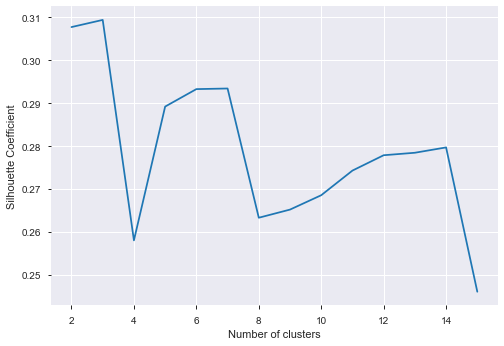

In [102]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [104]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df02_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [105]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,62832.581230
1,3,48711.316515
2,4,41833.177073
3,5,35344.010287
4,6,32012.735546
5,7,30007.943998
6,8,28135.634837
7,9,26333.084707
8,10,24708.184463
9,11,23361.308571


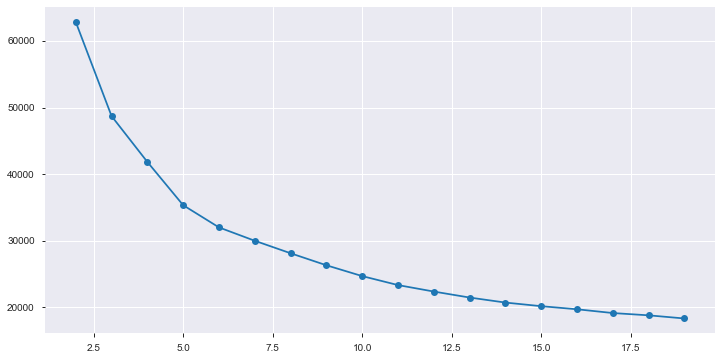

In [106]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [107]:
km_6.cluster_centers_

array([[-0.65888761, -0.28018869, -0.55489706,  0.29274984, -0.82207591,
        -0.15419629, -0.32975527, -0.40128242, -0.40224962],
       [ 1.64868349,  2.04521606,  1.51343385,  0.28316318,  0.61803363,
         1.20563863,  2.07306661,  0.17294672,  1.30041913],
       [ 0.09905566, -0.40654722,  0.26428325,  0.29908333,  1.17336661,
        -0.68999011, -0.46679777, -0.13590969, -0.36173837],
       [-0.37019945,  1.34233527, -0.47433239,  0.29272718, -0.58490789,
         0.49735465,  1.35688235, -0.46656665,  1.66741682],
       [ 1.82010397, -0.46958776,  1.37378457,  0.12238763,  0.75610579,
         1.12565024, -0.41735252,  1.68361429, -0.3498685 ],
       [-0.40831284, -0.49130697, -0.43275097, -2.94769298, -0.1407225 ,
        -0.59755303, -0.22259483,  0.40809554, -0.30199842]])

###  Profiling

In [109]:
df02_continous.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,...,12,7.950000,0.000000,0.040901,2,1,1,0,0,1
1,3202.467416,0.909091,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,...,12,0.000000,425.548562,0.457495,0,2,0,4,6,7
2,2495.148862,1.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,...,12,64.430833,0.000000,0.332687,1,0,3,3,2,0
3,1666.670542,0.636364,0.083333,0.083333,0.000000,0.083333,1,7500.0,89.988924,864.206542,...,12,124.916667,17.149001,0.222223,2,1,1,0,0,5
4,817.714335,1.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,...,12,1.333333,0.000000,0.681429,2,3,2,2,3,6


In [111]:
df02_continous.cluster_6.value_counts()/1000

0    3.318
2    2.087
3    1.236
4    1.069
5    0.755
1    0.485
Name: cluster_6, dtype: float64

In [112]:
df02_continous.cluster_6.value_counts()*100/sum(df02_continous.cluster_6.value_counts())

0    37.072626
2    23.318436
3    13.810056
4    11.944134
5     8.435754
1     5.418994
Name: cluster_6, dtype: float64

In [113]:
df02_continous.cluster_6.size

8950

In [114]:
size=pd.concat([pd.Series(df02_continous.cluster_3.size), pd.Series.sort_index(df02_continous.cluster_3.value_counts()), pd.Series.sort_index(df02_continous.cluster_4.value_counts()),
           pd.Series.sort_index(df02_continous.cluster_5.value_counts()), pd.Series.sort_index(df02_continous.cluster_6.value_counts()),
           pd.Series.sort_index(df02_continous.cluster_7.value_counts()), pd.Series.sort_index(df02_continous.cluster_8.value_counts())])

In [115]:
size

0    8950
0    1820
1    1598
2    5532
0    1460
1    3873
2    1230
3    2387
0    1156
1    3517
2    2135
3    1384
4     758
0    3318
1     485
2    2087
3    1236
4    1069
5     755
0    3137
1     480
2    1216
3    1884
4     753
5     734
6     746
0    1154
1    2396
2     510
3     742
4     427
5    1033
6    1805
7     883
dtype: int64

In [116]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/df02_continous.cluster_6.size, columns=['Seg_Pct'])

In [117]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.203352,0.178547,0.618101,0.163128,0.432737,0.13743,0.266704,0.129162,0.392961,...,0.082011,0.083352,0.128939,0.267709,0.056983,0.082905,0.047709,0.115419,0.201676,0.098659


In [118]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,1820.000000,1598.000000,5532.000000,1460.000000,3873.000000,1230.00000,2387.000000,1156.000000,3517.000000,...,734.000000,746.000000,1154.000000,2396.000000,510.000000,742.000000,427.000000,1033.000000,1805.000000,883.000000
Seg_Pct,1.0,0.203352,0.178547,0.618101,0.163128,0.432737,0.13743,0.266704,0.129162,0.392961,...,0.082011,0.083352,0.128939,0.267709,0.056983,0.082905,0.047709,0.115419,0.201676,0.098659


In [119]:
df02_continous.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,...,12,7.950000,0.000000,0.040901,2,1,1,0,0,1
1,3202.467416,0.909091,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,...,12,0.000000,425.548562,0.457495,0,2,0,4,6,7
2,2495.148862,1.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,...,12,64.430833,0.000000,0.332687,1,0,3,3,2,0
3,1666.670542,0.636364,0.083333,0.083333,0.000000,0.083333,1,7500.0,89.988924,864.206542,...,12,124.916667,17.149001,0.222223,2,1,1,0,0,5
4,817.714335,1.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,...,12,1.333333,0.000000,0.681429,2,3,2,2,3,6


In [120]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([df02_continous.apply(lambda x: x.mean()).T, df02_continous.groupby('cluster_3').apply(lambda x: x.mean()).T, df02_continous.groupby('cluster_4').apply(lambda x: x.mean()).T,
          df02_continous.groupby('cluster_5').apply(lambda x: x.mean()).T, df02_continous.groupby('cluster_6').apply(lambda x: x.mean()).T,
          df02_continous.groupby('cluster_7').apply(lambda x: x.mean()).T, df02_continous.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [121]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1452.399593,3785.593098,1643.115373,629.699666,1708.988579,314.764940,4488.423044,1576.878121,4611.709645,340.981596,...,745.082724,2128.340490,823.522160,204.396412,2711.912044,752.356425,4328.359500,865.193609,1530.230131,4658.612096
BALANCE_FREQUENCY,0.883252,0.972280,0.972660,0.828135,0.976149,0.764142,0.967165,0.976453,0.972933,0.773301,...,0.791446,0.903007,0.970755,0.745390,0.990691,0.790532,0.991834,0.823400,0.983777,0.970860
PURCHASES_FREQUENCY,0.490351,0.321153,0.919907,0.421932,0.926089,0.492649,0.314130,0.310908,0.318111,0.495514,...,0.418612,0.185863,0.920839,0.497587,0.526831,0.413240,0.929291,0.435340,0.269296,0.255799
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.107170,0.689721,0.093054,0.702156,0.105088,0.122506,0.096004,0.126296,0.113226,...,0.113083,0.069412,0.721600,0.071779,0.119151,0.112001,0.630386,0.133967,0.090478,0.104800
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.233150,0.630725,0.330709,0.646806,0.389464,0.219724,0.225689,0.223056,0.391144,...,0.285889,0.120053,0.582334,0.425354,0.433375,0.282113,0.762197,0.318098,0.188620,0.164995
CASH_ADVANCE_FREQUENCY,0.127637,0.297703,0.064672,0.089875,0.064143,0.052408,0.342359,0.177892,0.338923,0.047998,...,0.181528,0.310218,0.044614,0.041471,0.124060,0.184603,0.149089,0.068792,0.179328,0.376952
PURCHASES_TRX,12.684022,7.636813,37.234668,7.252711,38.621233,8.467080,7.817886,6.169250,8.131488,9.021894,...,5.028610,3.497319,34.811092,8.638147,12.827451,4.963612,46.667447,8.368829,5.086427,5.294451
CREDIT_LIMIT,4366.667327,6260.524476,6639.142678,3087.159804,6786.369863,3703.718401,7865.369549,2159.474934,8005.324001,3938.855157,...,2410.010603,5680.457389,5666.551127,2512.966286,3366.960784,2417.988926,8894.262295,7874.575376,2107.017544,8238.566869
PAYMENTS,1479.577413,2172.342818,2741.733658,887.068607,2855.871579,919.522337,2564.500590,987.431759,2630.550662,980.751829,...,659.611826,2440.649291,2466.863386,782.893452,1511.761693,680.396266,3624.213387,1499.513179,963.937461,2726.329504
MINIMUM_PAYMENTS,648.866073,1591.104726,626.718513,345.271975,636.478995,246.853458,1639.691581,798.160005,1694.517330,253.123662,...,339.194303,698.536189,315.014950,227.818284,2203.171642,332.637650,1618.112629,348.146533,581.964537,1615.539484


In [122]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [123]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,1820.000000,1598.000000,5532.000000,1460.000000,3873.000000,1230.000000,2387.000000,1156.000000,3517.000000,...,734.000000,746.000000,1154.000000,2396.000000,510.000000,742.000000,427.000000,1033.000000,1805.000000,883.000000
Seg_Pct,1.000000,0.203352,0.178547,0.618101,0.163128,0.432737,0.137430,0.266704,0.129162,0.392961,...,0.082011,0.083352,0.128939,0.267709,0.056983,0.082905,0.047709,0.115419,0.201676,0.098659
BALANCE,1452.399593,3785.593098,1643.115373,629.699666,1708.988579,314.764940,4488.423044,1576.878121,4611.709645,340.981596,...,745.082724,2128.340490,823.522160,204.396412,2711.912044,752.356425,4328.359500,865.193609,1530.230131,4658.612096
BALANCE_FREQUENCY,0.883252,0.972280,0.972660,0.828135,0.976149,0.764142,0.967165,0.976453,0.972933,0.773301,...,0.791446,0.903007,0.970755,0.745390,0.990691,0.790532,0.991834,0.823400,0.983777,0.970860
PURCHASES_FREQUENCY,0.490351,0.321153,0.919907,0.421932,0.926089,0.492649,0.314130,0.310908,0.318111,0.495514,...,0.418612,0.185863,0.920839,0.497587,0.526831,0.413240,0.929291,0.435340,0.269296,0.255799
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.107170,0.689721,0.093054,0.702156,0.105088,0.122506,0.096004,0.126296,0.113226,...,0.113083,0.069412,0.721600,0.071779,0.119151,0.112001,0.630386,0.133967,0.090478,0.104800
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.233150,0.630725,0.330709,0.646806,0.389464,0.219724,0.225689,0.223056,0.391144,...,0.285889,0.120053,0.582334,0.425354,0.433375,0.282113,0.762197,0.318098,0.188620,0.164995
CASH_ADVANCE_FREQUENCY,0.127637,0.297703,0.064672,0.089875,0.064143,0.052408,0.342359,0.177892,0.338923,0.047998,...,0.181528,0.310218,0.044614,0.041471,0.124060,0.184603,0.149089,0.068792,0.179328,0.376952
PURCHASES_TRX,12.684022,7.636813,37.234668,7.252711,38.621233,8.467080,7.817886,6.169250,8.131488,9.021894,...,5.028610,3.497319,34.811092,8.638147,12.827451,4.963612,46.667447,8.368829,5.086427,5.294451
CREDIT_LIMIT,4366.667327,6260.524476,6639.142678,3087.159804,6786.369863,3703.718401,7865.369549,2159.474934,8005.324001,3938.855157,...,2410.010603,5680.457389,5666.551127,2512.966286,3366.960784,2417.988926,8894.262295,7874.575376,2107.017544,8238.566869


In [124]:
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [125]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,1820.000000,1598.000000,5532.000000,1460.000000,3873.000000,1230.000000,2387.000000,1156.000000,3517.000000,...,734.000000,746.000000,1154.000000,2396.000000,510.000000,742.000000,427.000000,1033.000000,1805.000000,883.000000
Seg_Pct,1.000000,0.203352,0.178547,0.618101,0.163128,0.432737,0.137430,0.266704,0.129162,0.392961,...,0.082011,0.083352,0.128939,0.267709,0.056983,0.082905,0.047709,0.115419,0.201676,0.098659
BALANCE,1452.399593,3785.593098,1643.115373,629.699666,1708.988579,314.764940,4488.423044,1576.878121,4611.709645,340.981596,...,745.082724,2128.340490,823.522160,204.396412,2711.912044,752.356425,4328.359500,865.193609,1530.230131,4658.612096
BALANCE_FREQUENCY,0.883252,0.972280,0.972660,0.828135,0.976149,0.764142,0.967165,0.976453,0.972933,0.773301,...,0.791446,0.903007,0.970755,0.745390,0.990691,0.790532,0.991834,0.823400,0.983777,0.970860
PURCHASES_FREQUENCY,0.490351,0.321153,0.919907,0.421932,0.926089,0.492649,0.314130,0.310908,0.318111,0.495514,...,0.418612,0.185863,0.920839,0.497587,0.526831,0.413240,0.929291,0.435340,0.269296,0.255799
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.107170,0.689721,0.093054,0.702156,0.105088,0.122506,0.096004,0.126296,0.113226,...,0.113083,0.069412,0.721600,0.071779,0.119151,0.112001,0.630386,0.133967,0.090478,0.104800
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.233150,0.630725,0.330709,0.646806,0.389464,0.219724,0.225689,0.223056,0.391144,...,0.285889,0.120053,0.582334,0.425354,0.433375,0.282113,0.762197,0.318098,0.188620,0.164995
CASH_ADVANCE_FREQUENCY,0.127637,0.297703,0.064672,0.089875,0.064143,0.052408,0.342359,0.177892,0.338923,0.047998,...,0.181528,0.310218,0.044614,0.041471,0.124060,0.184603,0.149089,0.068792,0.179328,0.376952
PURCHASES_TRX,12.684022,7.636813,37.234668,7.252711,38.621233,8.467080,7.817886,6.169250,8.131488,9.021894,...,5.028610,3.497319,34.811092,8.638147,12.827451,4.963612,46.667447,8.368829,5.086427,5.294451
CREDIT_LIMIT,4366.667327,6260.524476,6639.142678,3087.159804,6786.369863,3703.718401,7865.369549,2159.474934,8005.324001,3938.855157,...,2410.010603,5680.457389,5666.551127,2512.966286,3366.960784,2417.988926,8894.262295,7874.575376,2107.017544,8238.566869


In [126]:
Profling_output_final.to_csv('Profiling_output.csv')